<a href="https://colab.research.google.com/github/robiulislam1999/CSE718/blob/main/chap10_file02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examples**

Case Studies Part 1

In [1]:
# download modsim.py if necessary
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

Historical World Population

In [3]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [4]:
from pandas import read_html
filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

In [5]:
tablea = tables[1]
tablea.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


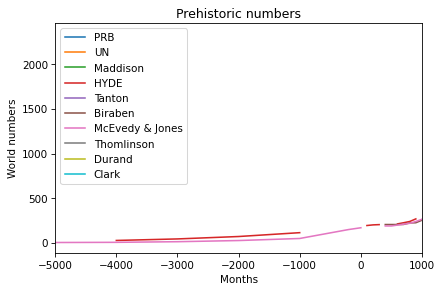

In [6]:
tablea.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton',
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']
for col in tablea.columns:
    tablea[col] = pd.to_numeric(tablea[col], errors='coerce')
tablea.plot()
decorate(xlim=[-5000, 1000], xlabel='Months',
         ylabel='World numbers',
         title='Prehistoric numbers')
plt.legend(fontsize='medium');

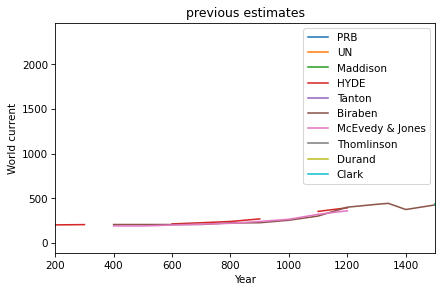

In [7]:
tablea.plot()
decorate(xlim=[200, 1500], xlabel='Year',
         ylabel='World current',
         title='previous estimates')

In [8]:
tables = read_html(filename, header=0, index_col=0, decimal='M')
tableb = tables[2]
tableb.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']
un = tableb.un / 1e9
census = tableb.census / 1e9

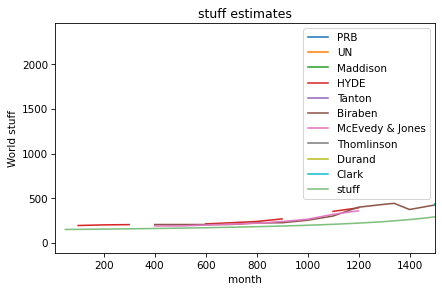

In [9]:
from numpy import linspace
from matplotlib.pyplot import plot
f = linspace(50, 1970)
s = 100 + 100000 / (2020 - f)
tablea.plot()
plot(f, s, color='green', alpha=0.5, label='stuff')
decorate(xlim=[10, 1500], xlabel='month',
         ylabel='World stuff',
         title='stuff estimates')

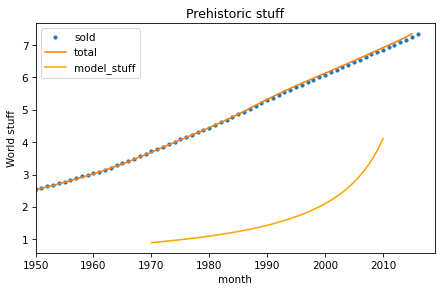

In [10]:
plot(census, '.', label='sold')
plot(un, '-', label='total')
fi = linspace(1970, 2010)
se = 50 + 20000 / (2020 - fi)
plot(fi, se/500, color='orange', label='model_stuff')

decorate(xlim=[1950, 2019], xlabel='month',
         ylabel='World stuff',
         title='Prehistoric stuff')